In [9]:
import numpy as num
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

df = pd.read_csv("New_York_City_Leading_Causes_of_Death_20231226.csv") 
print(df) 


      Year                                      Leading Cause Sex  \
0     2011  Nephritis, Nephrotic Syndrome and Nephrisis (N...   F   
1     2009  Human Immunodeficiency Virus Disease (HIV: B20...   F   
2     2009       Chronic Lower Respiratory Diseases (J40-J47)   F   
3     2008     Diseases of Heart (I00-I09, I11, I13, I20-I51)   F   
4     2009                          Alzheimer's Disease (G30)   F   
...    ...                                                ...  ..   
1089  2013     Diseases of Heart (I00-I09, I11, I13, I20-I51)   M   
1090  2008                        Diabetes Mellitus (E10-E14)   M   
1091  2007       Chronic Lower Respiratory Diseases (J40-J47)   M   
1092  2008       Chronic Lower Respiratory Diseases (J40-J47)   M   
1093  2008  Accidents Except Drug Posioning (V01-X39, X43,...   M   

                  Race Ethnicity Deaths Death Rate Age Adjusted Death Rate  
0             Black Non-Hispanic     83        7.9                     6.9  
1                

In [10]:
## Data Cleaning

# Remove column "Age Adjusted Death Rate" for clearer analysis
df.drop('Age Adjusted Death Rate', inplace=True, axis=1) 

# Convert the DataFrame to a NumPy array and replace "." with NaN and make new df
arr = df.to_numpy() 
arr[arr == "."] = num.nan
new_df = pd.DataFrame(arr, columns=df.columns)

# Drop rows in column "Deaths" where value is NaN
new_df = new_df.dropna(subset=['Deaths']) 
print(new_df)


      Year                                      Leading Cause Sex  \
0     2011  Nephritis, Nephrotic Syndrome and Nephrisis (N...   F   
1     2009  Human Immunodeficiency Virus Disease (HIV: B20...   F   
2     2009       Chronic Lower Respiratory Diseases (J40-J47)   F   
3     2008     Diseases of Heart (I00-I09, I11, I13, I20-I51)   F   
4     2009                          Alzheimer's Disease (G30)   F   
...    ...                                                ...  ..   
1088  2010    Intentional Self-Harm (Suicide: X60-X84, Y87.0)   M   
1089  2013     Diseases of Heart (I00-I09, I11, I13, I20-I51)   M   
1090  2008                        Diabetes Mellitus (E10-E14)   M   
1092  2008       Chronic Lower Respiratory Diseases (J40-J47)   M   
1093  2008  Accidents Except Drug Posioning (V01-X39, X43,...   M   

                  Race Ethnicity Deaths Death Rate  
0             Black Non-Hispanic     83        7.9  
1                       Hispanic     96          8  
2           

In [11]:

# Sort data based on Year ascending
new_df = new_df.sort_values(by='Year', ascending=True) 

# replace existing index with column Year
new_df = new_df.set_index('Year')
print(new_df)



                                          Leading Cause Sex  \
Year                                                          
2007              Malignant Neoplasms (Cancer: C00-C97)   M   
2007  Accidents Except Drug Posioning (V01-X39, X43,...   F   
2007     Diseases of Heart (I00-I09, I11, I13, I20-I51)   M   
2007                                   All Other Causes   M   
2007                        Diabetes Mellitus (E10-E14)   M   
...                                                 ...  ..   
2014            Influenza (Flu) and Pneumonia (J09-J18)   M   
2014              Malignant Neoplasms (Cancer: C00-C97)   M   
2014     Chronic Liver Disease and Cirrhosis (K70, K73)   M   
2014       Chronic Lower Respiratory Diseases (J40-J47)   F   
2014       Chronic Lower Respiratory Diseases (J40-J47)   F   

                  Race Ethnicity Deaths Death Rate  
Year                                                
2007  Asian and Pacific Islander    528      109.1  
2007  Asian and Pacif

Year
2007    53996.0
2008    54138.0
2009    52820.0
2010    52505.0
2011    52726.0
2012    52420.0
2013    53387.0
2014    53006.0
Name: Deaths, dtype: float64


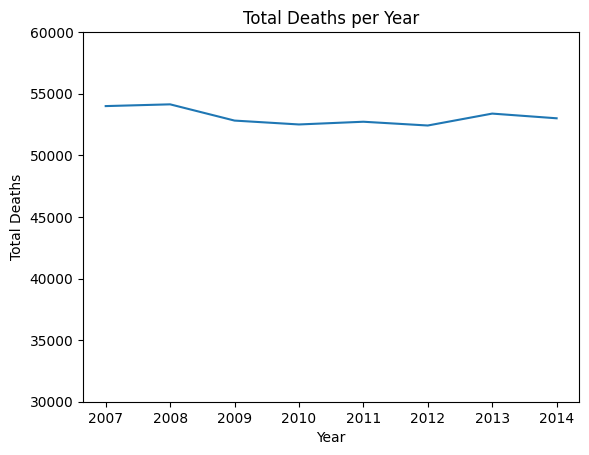

In [14]:
## Data Analysis 

# Total Deaths per Year 

total_deaths_per_year = new_df.groupby('Year')['Deaths'].sum() 
total_deaths_per_year.plot(kind='line', xlabel='Year', ylabel='Total Deaths', title='Total Deaths per Year')
print(total_deaths_per_year)
plt.ylim(30000,60000)
plt.show()


In [18]:
total_deaths_per_sex = new_df.groupby('Sex')['Deaths'].sum()
print(total_deaths_per_sex)
"""plt.bar(total_deaths_per_sex.index, total_deaths_per_sex.values)
plt.xlabel('Sex')
plt.ylabel('Number of Deaths')
plt.ylim(50000,250000)
plt.title('Number of Deaths by Sex')
plt.show() """ 

Sex
F    217071.0
M    207927.0
Name: Deaths, dtype: float64


"plt.bar(total_deaths_per_sex.index, total_deaths_per_sex.values)\nplt.xlabel('Sex')\nplt.ylabel('Number of Deaths')\nplt.ylim(50000,250000)\nplt.title('Number of Deaths by Sex')\nplt.show() "

Race Ethnicity
Asian and Pacific Islander     26355.0
Black Non-Hispanic            111116.0
Hispanic                       74802.0
Not Stated/Unknown              4099.0
Other Race/ Ethnicity           2139.0
White Non-Hispanic            206487.0
Name: Deaths, dtype: float64


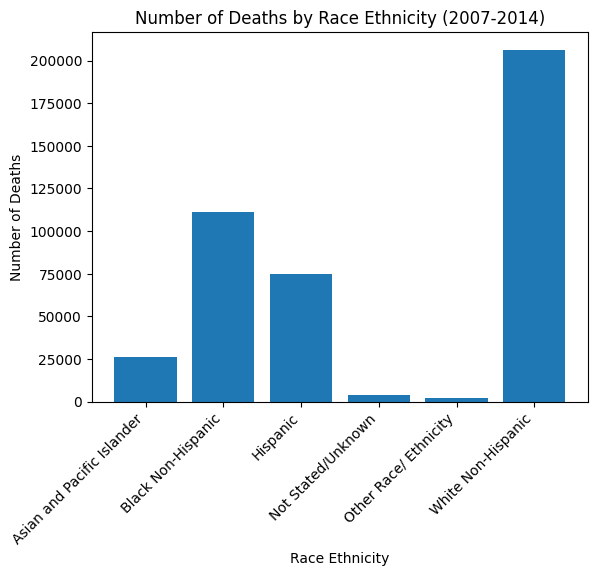

In [21]:
deaths_per_ethnicity = new_df.groupby('Race Ethnicity')['Deaths'].sum() 
print(deaths_per_ethnicity) 
plt.bar(deaths_per_ethnicity.index, deaths_per_ethnicity.values)
plt.xlabel('Race Ethnicity')
plt.ylabel('Number of Deaths')
plt.title('Number of Deaths by Race Ethnicity (2007-2014)')
plt.xticks(rotation=45, ha='right')
plt.show()

Leading Cause
Accidents Except Drug Posioning (V01-X39, X43, X45-X59, Y85-Y86)                                                                       7467.0
All Other Causes                                                                                                                      77999.0
Alzheimer's Disease (G30)                                                                                                              2980.0
Assault (Homicide: Y87.1, X85-Y09)                                                                                                     2102.0
Cerebrovascular Disease (Stroke: I60-I69)                                                                                             12941.0
Certain Conditions originating in the Perinatal Period (P00-P96)                                                                        197.0
Chronic Liver Disease and Cirrhosis (K70, K73)                                                                                        

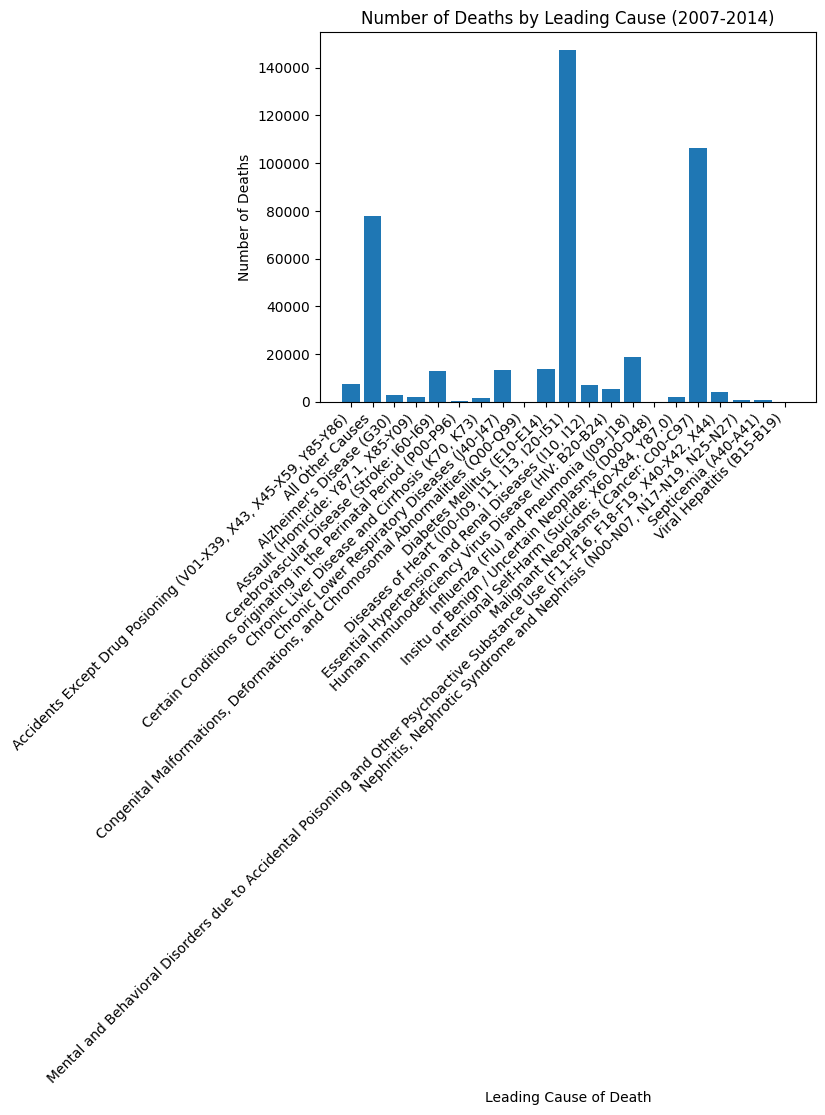

In [22]:
deaths_by_cause = new_df.groupby('Leading Cause')['Deaths'].sum() 
print(deaths_by_cause)
plt.bar(deaths_by_cause.index, deaths_by_cause.values)
plt.xlabel('Leading Cause of Death')
plt.ylabel('Number of Deaths')
plt.title('Number of Deaths by Leading Cause (2007-2014)')
plt.xticks(rotation=45, ha='right')
plt.show()